### Data
COVID-19 cases, deaths, vaccinations:
https://data.who.int/dashboards/covid19/data?n=o

What you need:
`./data/who_covid_cases.csv` and `./data/who_covid_vaccination.csv`

### Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

plt.style.use('seaborn-v0_8')

### COVID-19 cases and deaths

In [2]:
dfc = pd.read_csv('./data/who_covid_cases.csv')
dfc

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
60235,2024-09-22,ZW,Zimbabwe,AFRO,NaN,266393,NaN,5740
60236,2024-09-29,ZW,Zimbabwe,AFRO,0.00,266393,0.00,5740
60237,2024-10-06,ZW,Zimbabwe,AFRO,3.00,266396,0.00,5740
60238,2024-10-13,ZW,Zimbabwe,AFRO,NaN,266396,NaN,5740


### Line graph

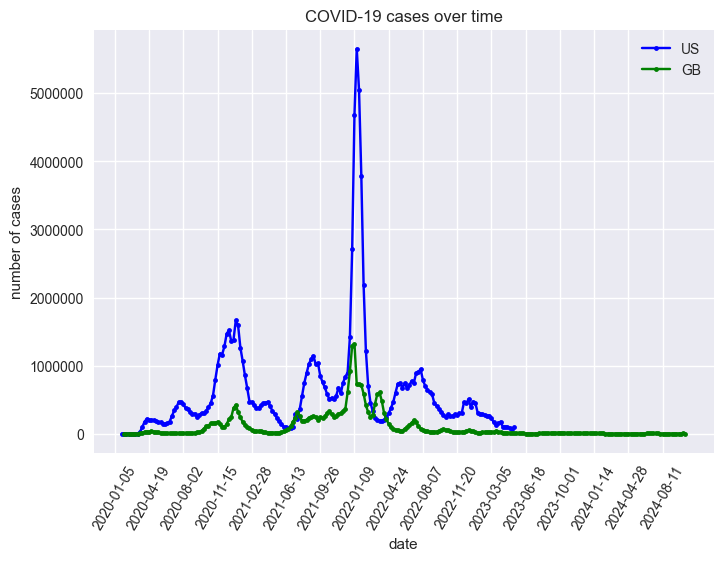

In [3]:
# See number of cases of US and GB over time

plt.title('COVID-19 cases over time')

plt.plot(dfc[dfc['Country_code'] == 'US']['Date_reported'], dfc[dfc['Country_code'] == 'US']['New_cases'], 'b.-')
plt.plot(dfc[dfc['Country_code'] == 'GB']['Date_reported'], dfc[dfc['Country_code'] == 'GB']['New_cases'], 'g.-')

plt.legend(['US', 'GB'])

xticks = dfc['Date_reported'].unique()[::15]
plt.xticks(xticks, rotation=60)

plt.xlabel('date')
plt.ylabel('number of cases')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 7))

plt.show()

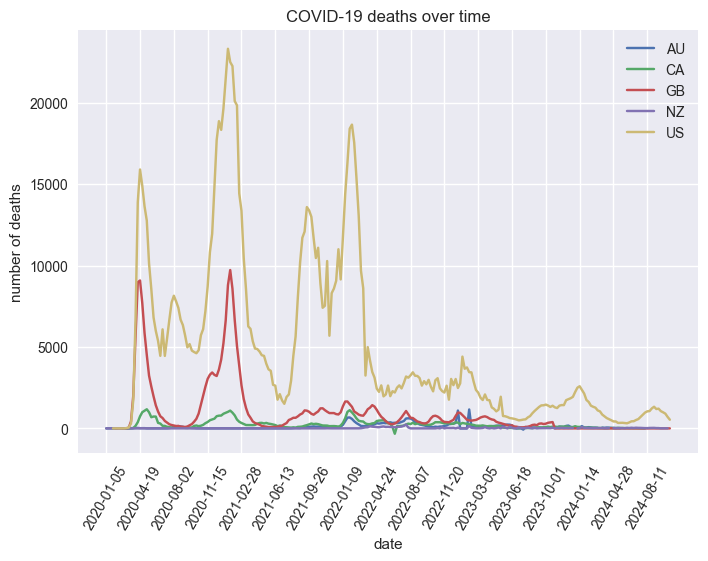

In [4]:
# See number of deaths of AU, CA, GB, NZ and US over time

plt.title('COVID-19 deaths over time')

countries = ['AU', 'CA', 'GB', 'NZ', 'US']

# You don't have to write plt.plot() for five times - just use a 'for' loop
for country in countries:
    plt.plot(dfc[dfc['Country_code'] == country]['Date_reported'], dfc[dfc['Country_code'] == country]['New_deaths'])

plt.legend(countries)

plt.xticks(dfc['Date_reported'].unique()[::15], rotation=60)
plt.xlabel('date')
plt.ylabel('number of deaths')

# We are also saving this plot to a file
plt.savefig('covid_death.png', dpi=600)

plt.show()

### COVID-19 vaccination

In [5]:
dfv = pd.read_csv('./data/who_covid_vaccination.csv')
dfv

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.00,90493.00,203.00,85.00,84363.00,79.00,NaN,2021-02-17,NaN,35659.00,33.00
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.00,19151369.00,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.00,16550642.00,85.00,50.00,9609080.00,29.00,NaN,2021-03-10,NaN,3067091.00,9.00
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.00,10858.00,166.00,72.00,10382.00,69.00,NaN,2021-02-05,NaN,3231.00,22.00
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.00,1349255.00,107.00,47.00,1279333.00,44.00,NaN,2021-01-13,NaN,402371.00,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,"Taiwan, China",TWN,NaN,REPORTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,VNM,WPRO,REPORTING,2023-06-30,266492149.00,90497674.00,274.00,93.00,85961564.00,88.00,NaN,2021-03-08,NaN,57975220.00,60.00
212,Vanuatu,VUT,WPRO,REPORTING,2023-02-20,355430.00,176624.00,116.00,58.00,162250.00,53.00,NaN,2021-06-02,NaN,16556.00,5.00
213,Wallis and Futuna,WLF,WPRO,REPORTING,2023-01-23,17303.00,7150.00,154.00,64.00,6803.00,60.00,NaN,2021-03-19,NaN,3350.00,30.00


In [6]:
dfv.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,209.00,209.00,207.00,207.00,209.00,207.00,0.00,0.00,195.00,184.00
mean,65350335.32,26842382.04,153.93,62.77,24726194.90,57.76,NaN,NaN,12857106.35,33.12
std,296749924.47,119047651.14,85.72,24.06,113325167.47,24.20,NaN,NaN,63652042.14,23.95
min,4619.00,1638.00,4.00,4.00,1635.00,3.00,NaN,NaN,314.00,1.00
25%,903424.00,451149.00,82.00,45.00,397080.00,38.50,NaN,NaN,76120.00,10.00
50%,7372208.00,3746041.00,154.00,67.00,3324555.00,62.00,NaN,NaN,803560.00,31.00
75%,27322059.00,13568372.00,221.50,83.00,11090440.00,77.50,NaN,NaN,5230597.50,56.00
max,3516880717.00,1318026807.00,470.00,100.00,1284479582.00,100.00,NaN,NaN,834060133.00,83.00


### Pie chart

In [7]:
# This is the mapping that will be used later in legend
who_regions_mapping = {
    'AMRO': 'Americas',
    'EMRO': 'Eastern Mediterranean',
    'AFRO': 'African',
    'EURO': 'European',
    'WPRO': 'Western Pacific',
    'SEARO': 'South-East Asian'
}

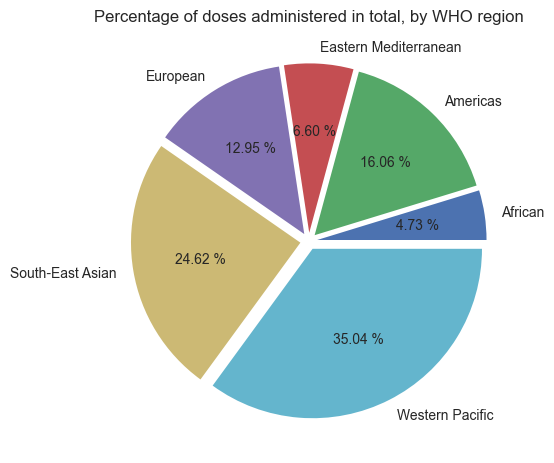

In [8]:
# See percentage of doses administered by region

plt.title('Percentage of doses administered in total, by WHO region')

df_sum_by_region = dfv.groupby(['WHO_REGION']).sum()
df_sum_by_region['TOTAL_VACCINATIONS']

plt.pie(df_sum_by_region['TOTAL_VACCINATIONS'], labels=[who_regions_mapping[key] for key in df_sum_by_region.index], autopct="%.2f %%", explode=[0.05]*len(df_sum_by_region))

plt.show()

### Histogram and bar plot

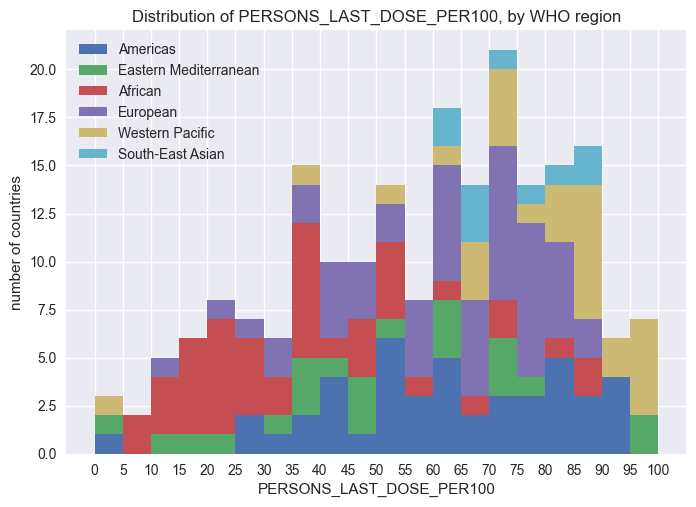

In [9]:
bins = range(0, 105, 5)

plt.title('Distribution of PERSONS_LAST_DOSE_PER100, by WHO region')

dfv_region_and_values = dfv[['WHO_REGION', 'PERSONS_LAST_DOSE_PER100']].dropna(subset=['WHO_REGION', 'PERSONS_LAST_DOSE_PER100'])



# COMMON MISTAKE - The following two lines of code are wrong!

# START OF WRONG CODE 1
# for region in dfv_region_and_values['WHO_REGION'].unique():
#     plt.hist(dfv_region_and_values[dfv_region_and_values['WHO_REGION'] == region]['PERSONS_LAST_DOSE_PER100'], bins=bins, stacked=True)
# END OF WRONG CODE 1

# Bars in the histogram from each region are overlapping, while the expected output is stacked!
# Google search "matplotlib stacked hist covers up"
# https://stackoverflow.com/questions/18449602/create-stacked-histogram-from-unequal-length-arrays

# Usually you cannot call hist() multiple times on the same plot as the drawings will overlap, which could be misleading!
# Set transparency by adding alpha=0.5 to see how those bars have overlapped

# START OF WRONG CODE 2
# for region in dfv_region_and_values['WHO_REGION'].unique():
#     plt.hist(dfv_region_and_values[dfv_region_and_values['WHO_REGION'] == region]['PERSONS_LAST_DOSE_PER100'], bins=bins, stacked=True, alpha=0.5)
# END OF WRONG CODE 2

# START OF CORRECT CODE
who_regions_unique = dfv_region_and_values['WHO_REGION'].unique()
plt.hist([dfv_region_and_values[dfv_region_and_values['WHO_REGION'] == region]['PERSONS_LAST_DOSE_PER100'] for region in who_regions_unique], bins=bins, stacked=True)
# END OF CORRECT CODE



plt.legend([who_regions_mapping[region] for region in who_regions_unique])
    
plt.xticks(bins)

plt.xlabel('PERSONS_LAST_DOSE_PER100')
plt.ylabel('number of countries')

plt.show()

#### Read the histogram
Can we draw the conclusion "the African region has lower coverage of the vaccination while the Western Pacific region has higher coverage"?

### Box plot

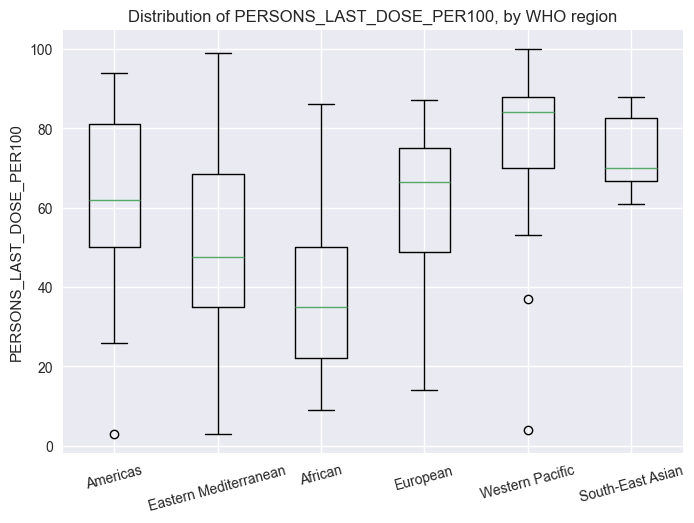

In [10]:
plt.title('Distribution of PERSONS_LAST_DOSE_PER100, by WHO region')


# Elements of a box plot: outliers, minimum, Q1 (quartile / 25 percentile), Median (not mean/avg), Q3, maximum
# https://stackoverflow.com/a/51163885

# START OF BOX PLOT
plt.boxplot([dfv_region_and_values[dfv_region_and_values['WHO_REGION'] == region]['PERSONS_LAST_DOSE_PER100'] for region in who_regions_unique], tick_labels=[who_regions_mapping[region] for region in who_regions_unique])
# END OF BOX PLOT

# Alternatively, use violin plot
# https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

# START OF VIOLIN PLOT
# plt.violinplot([dfv_region_and_values[dfv_region_and_values['WHO_REGION'] == region]['PERSONS_LAST_DOSE_PER100'] for region in who_regions_unique], showmedians=True)
# ax = plt.gca()
# ax.set_xticks([y + 1 for y in range(len(who_regions_unique))], labels=[who_regions_mapping[region] for region in who_regions_unique])
# END OF VIOLIN PLOT



plt.xticks(rotation=15)

plt.ylabel('PERSONS_LAST_DOSE_PER100')

plt.show()

Can this plot further support the conclusion we made above?